In [1]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm

In [2]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [3]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [4]:
train_set_almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

In [5]:
corpora_almada = load_corpora(train_set_almada, 'Almada Negreiros')
corpora_almada.shape

(9, 2)

In [6]:
train_set_camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(train_set_camilo, 'Camilo Castelo Branco')
corpora_camilo.shape

(20, 2)

In [7]:
train_set_eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(train_set_eca, 'Eca de Queiros')
corpora_eca.shape

(5, 2)

In [8]:
train_set_rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(train_set_rodrigues_santos, 'Jose Rodrigues dos Santos')
corpora_rodrigues_santos.shape

(8, 2)

In [9]:
train_set_saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(train_set_saramago, 'Jose Saramago')
corpora_saramago.shape

(12, 2)

In [10]:
train_set_luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(train_set_luisa, 'Luisa Marques Silva')
corpora_luisa.shape

(9, 2)

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.shape

(63, 2)

In [12]:
"""
from unidecode import unidecode

corpora['Text'] = corpora['Text'].apply(lambda text: unidecode(text))

corpora
"""

"\nfrom unidecode import unidecode\n\ncorpora['Text'] = corpora['Text'].apply(lambda text: unidecode(text))\n\ncorpora\n"

In [13]:
"""
char = ''

for text in corpora['Text']:
    characters = list(set(text))
    for c in characters:
        char += c
    #print(list(set(text)))
    
print(list(set(char)))
"""

"\nchar = ''\n\nfor text in corpora['Text']:\n    characters = list(set(text))\n    for c in characters:\n        char += c\n    #print(list(set(text)))\n    \nprint(list(set(char)))\n"

In [14]:
"""
rep = {'\n':' ',
       '#':'',
       '+':'',
       '-':' ',
       '_':'',
       '<':'',
       '>':'',
       '=':'',
       '*':'',
       '\\':'',
       '|':'',
       '~':'',
       '[':'',
       ']':'',
       "'":' ',
       '"':'',
       '  ':' '
      }

for i,j in rep.items():
    corpora['Text'] = corpora['Text'].apply(lambda text: text.replace(i,j))

#print(corpora.loc[0,'Text'])

corpora
"""

'\nrep = {\'\n\':\' \',\n       \'#\':\'\',\n       \'+\':\'\',\n       \'-\':\' \',\n       \'_\':\'\',\n       \'<\':\'\',\n       \'>\':\'\',\n       \'=\':\'\',\n       \'*\':\'\',\n       \'\\\':\'\',\n       \'|\':\'\',\n       \'~\':\'\',\n       \'[\':\'\',\n       \']\':\'\',\n       "\'":\' \',\n       \'"\':\'\',\n       \'  \':\' \'\n      }\n\nfor i,j in rep.items():\n    corpora[\'Text\'] = corpora[\'Text\'].apply(lambda text: text.replace(i,j))\n\n#print(corpora.loc[0,\'Text\'])\n\ncorpora\n'

In [15]:
#print(corpora['Text'][0])

In [16]:
def preprocessing(dataframe):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #Remove specific punctuations
        #rep = {'\n':' ','#':'','+':'','-':' ','_':'','<':'','>':'','=':'','*':'','\\':'','|':'','~':'','[':'',']':'',
               #"'":' ','"':'','  ':' '}
        #remove punctuation 
        text = re.sub('[^a-zA-Z]', ' ', text) 

        #for i,j in rep.items():
            #text = text.replace(i,j)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #print(text)
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt] 
        text = " ".join(text)
        
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #text = " ".join(text_2)
        #print(text)
        processed_corpus.append(text)
    return processed_corpus

In [17]:
cleaned_corpora = preprocessing(corpora)

In [18]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)
corpora

,Text,Author,Clean Text
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...
...,...,...,...
58,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,Luisa Marques Silva,titulo medo autora inspiradissima luisa marque...
59,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",Luisa Marques Silva,lisboa lisboa ano agosto tao gelado ha vinte a...
60,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,Luisa Marques Silva,titulo passeio inferno autora luisa marque sil...
61,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,Luisa Marques Silva,titulo rapsodia maior autora luisa marque silv...


In [19]:
word_count = corpora['Clean Text'].apply(lambda x: len(str(x).split(" ")))
word_count_2 = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
corpora['word_count_text'] = word_count_2
corpora['word_count_clean'] = word_count
corpora.head()

,Text,Author,Clean Text,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,1456,1139
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,280,203
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,6212,3439
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,1225,476
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,521,354


In [20]:
corpora.groupby(['Author']).sum()

,word_count_text,word_count_clean
Author,,
Almada Negreiros,43610,27887
Camilo Castelo Branco,749872,454886
Eca de Queiros,438367,272083
Jose Rodrigues dos Santos,1131971,668358
Jose Saramago,1006571,583250
Luisa Marques Silva,41214,24114


In [21]:
corpora.word_count_clean.describe()

count        63.000000
mean      32231.396825
std       31577.716825
min         203.000000
25%        3599.500000
50%       28211.000000
75%       45676.500000
max      131684.000000
Name: word_count_clean, dtype: float64

In [22]:
all_words = ' '.join(corpora['Clean Text']).split()

In [23]:
# Count all words
freq = pd.Series(all_words).value_counts()

In [24]:
freq[:25]

nao       52050
d         12481
ja         9952
disse      7494
la         7176
ser        7060
ainda      6639
ha         5941
bem        5716
dia        5661
onde       5642
mao        5556
so         5418
ate        5225
sobre      5090
porque     5011
assim      4912
olhos      4908
n          4875
toda       4868
tempo      4857
aqui       4824
tudo       4785
agora      4730
homem      4713
dtype: int64

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

From the top 30 most frequent words count the number of stopwords. What's the percentage?

In [26]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("portuguese"))
count = 0
for word in freq.index[:30]:
    if word in stopwords:
        count += 1
count

0

In [28]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
count = 0
for word in freq.index[:30]:
    if word in stopwords:
        count += 1
count

2

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    stop_words="portuguese", 
    max_features=10000, 
    ngram_range=(1,3) # all inclusive from {1,2,3}, if only bigrams use (2,2)
)

In [30]:
X = cv.fit_transform(cleaned_corpora)

In [32]:
list(cv.vocabulary_.keys())[:10]

['scena',
 'odio',
 'author',
 'almada',
 'portuguese',
 'alvaro',
 'campos',
 'poema',
 'escripto',
 'noites']

In [33]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [34]:
top_df = get_top_n_grams(cleaned_corpora, top_k=20, n=1)

In [35]:
top_df.head(10)

,Ngram,Freq
0,nao,52050
1,ja,9952
2,disse,7494
3,la,7176
4,ser,7060
5,ainda,6639
6,ha,5941
7,bem,5716
8,dia,5661
9,onde,5642


In [36]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

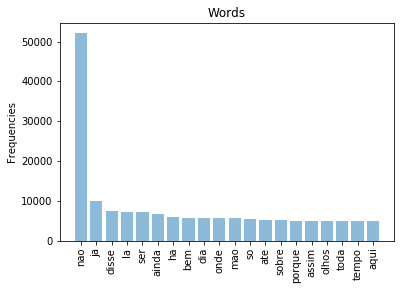

In [37]:
plot_frequencies(top_df)

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [41]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = cleaned_corpora[10]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [42]:
tf_idf_vector.toarray()

array([[0.        , 0.        , 0.00187421, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [44]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())[:10]

[('venceslau', 0.6063394397651788),
 ('julia', 0.40937297538734846),
 ('eduardo', 0.2899735257983129),
 ('elle', 0.1906393524991734),
 ('taveira', 0.18088181784367507),
 ('commendador', 0.16953572839932024),
 ('anna', 0.1518336435465516),
 ('venceslau taveira', 0.14788766823540944),
 ('snr', 0.1461882694016617),
 ('vaz', 0.1358434535271376)]

In [46]:
doc = cleaned_corpora[10]

In [47]:
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))
tf_idf_vector

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 4331 stored elements in Compressed Sparse Row format>